In [1]:
# Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Importing the Warnings to not get future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
data = pd.read_csv(r"C:\Users\Shashi\Unsupervised Learning or Descriptive Model\Association Rules\myphonedata.csv")

In [4]:
# Checking for head of data, which gives top 5 rows
data.head()

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1


In [5]:
# 1st Business Moment : Measures of Central Tendency
# Checking the mean, mode, median
data.mean()

red       0.545455
white     0.636364
green     0.181818
yellow    0.090909
orange    0.181818
blue      0.545455
dtype: float64

In [6]:
data.mode()

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,blue,blue,1.0,1.0,0.0,0.0,0.0,1.0
1,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.median()

red       1.0
white     1.0
green     0.0
yellow    0.0
orange    0.0
blue      1.0
dtype: float64

In [8]:
# 2nd Business Moment : Measures of Dispersation
# Checking for Variance, Standard Distibution
data.var()

red       0.272727
white     0.254545
green     0.163636
yellow    0.090909
orange    0.163636
blue      0.272727
dtype: float64

In [9]:
data.std()

red       0.522233
white     0.504525
green     0.404520
yellow    0.301511
orange    0.404520
blue      0.522233
dtype: float64

In [10]:
# 3rd Business Moment : Measures of Skewness
data.skew()

red      -0.212762
white    -0.660687
green     1.922718
yellow    3.316625
orange    1.922718
blue     -0.212762
dtype: float64

In [11]:
# 4th Business Moment : Measures of Kurtisos
data.kurt()

red       -2.444444
white     -1.964286
green      2.037037
yellow    11.000000
orange     2.037037
blue      -2.444444
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b16dfa8910>,
 'caps': [<matplotlib.lines.Line2D at 0x1b16dfa8eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b16dfa8640>],
 'medians': [<matplotlib.lines.Line2D at 0x1b16e66a490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b16e66a760>],
 'means': []}

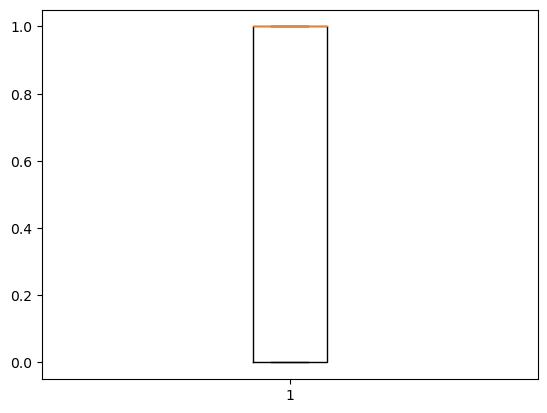

In [12]:
# Graphical Representation
# Using box plot to check outliers
plt.boxplot(data['red'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b16e6c4a60>,
 'caps': [<matplotlib.lines.Line2D at 0x1b16e6d3040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b16e6c4790>],
 'medians': [<matplotlib.lines.Line2D at 0x1b16e6d3610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b16e6d3910>],
 'means': []}

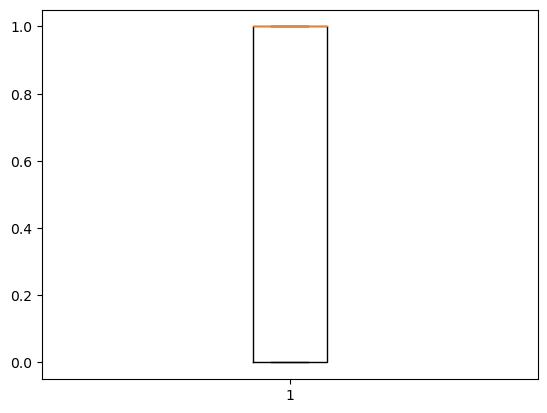

In [13]:
plt.boxplot(data['white'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b16e728e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1b16e739460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b16e728bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b16e739a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b16e739cd0>],
 'means': []}

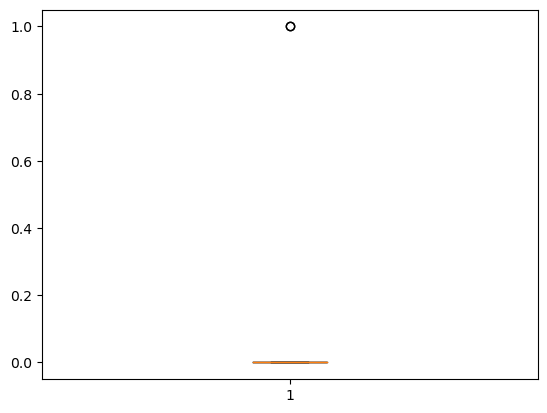

In [14]:
plt.boxplot(data['green'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b16e79d580>,
 'caps': [<matplotlib.lines.Line2D at 0x1b16e79db20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b16e79d280>],
 'medians': [<matplotlib.lines.Line2D at 0x1b16e7aa100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b16e7aa3d0>],
 'means': []}

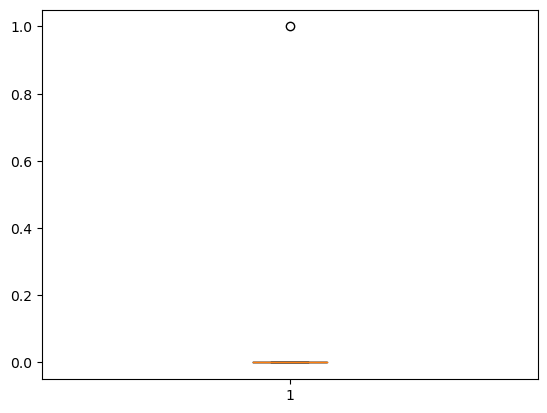

In [15]:
plt.boxplot(data['yellow'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b16e87cb20>,
 'caps': [<matplotlib.lines.Line2D at 0x1b16e889100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b16e87c940>],
 'medians': [<matplotlib.lines.Line2D at 0x1b16e8896a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b16e889970>],
 'means': []}

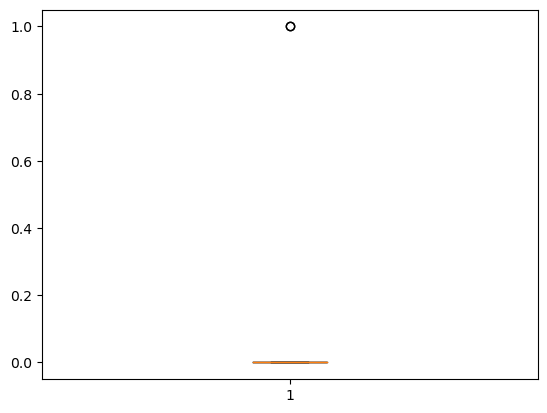

In [16]:
plt.boxplot(data['orange'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b16ea1ee50>,
 'caps': [<matplotlib.lines.Line2D at 0x1b16e8ad430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b16ea1eb80>],
 'medians': [<matplotlib.lines.Line2D at 0x1b16e8ad9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b16e8adca0>],
 'means': []}

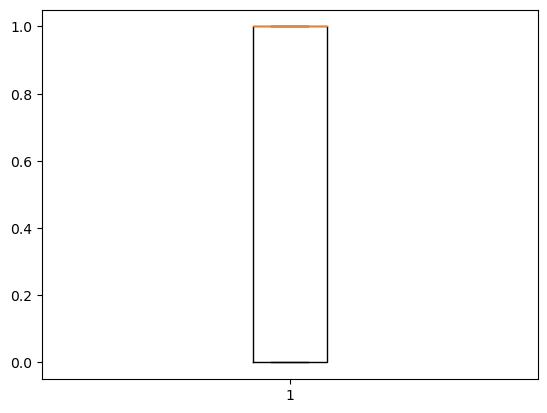

In [17]:
plt.boxplot(data['blue'])

In [18]:
# Importing Winsorization to clean outliers 
from feature_engine.outliers import Winsorizer

<AxesSubplot:xlabel='orange'>

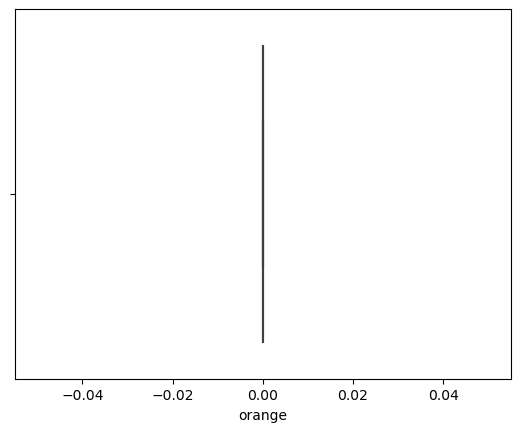

In [19]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both', 
                            fold = 1.5,
                             variables = ('orange'))

data_iqr = winsor_iqr.fit_transform(data[['orange']])

sns.boxplot(data_iqr['orange'])

<AxesSubplot:xlabel='yellow'>

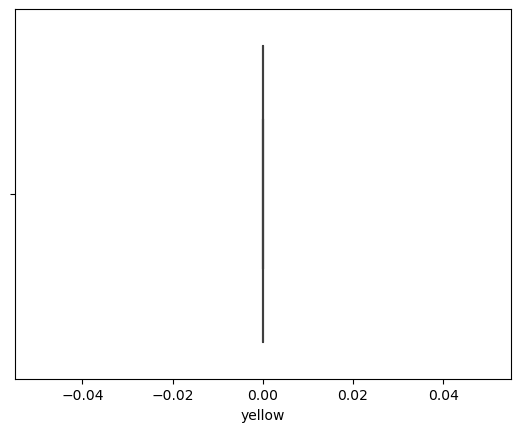

In [20]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both', 
                            fold = 1.5,
                             variables = ('yellow'))

data_iqr = winsor_iqr.fit_transform(data[['yellow']])

sns.boxplot(data_iqr['yellow'])

<AxesSubplot:xlabel='green'>

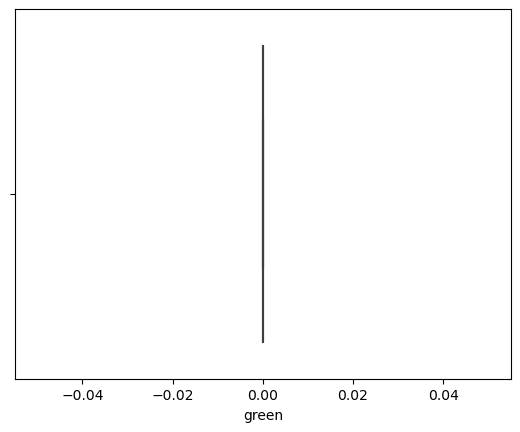

In [21]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both', 
                            fold = 1.5,
                             variables = ('green'))

data_iqr = winsor_iqr.fit_transform(data[['green']])

sns.boxplot(data_iqr['green'])

In [22]:
Checking the duplicates
duplicates = data.duplicated()
sum(duplicates)

3

In [27]:
# Removing the duplicates using drop
data = data.drop_duplicates(keep = 'last')

In [28]:
duplicates = data.duplicated()
sum(duplicates)

0

In [29]:
# Checking for Missing Values
data.isna().sum()

V1        0
V2        2
V3        5
red       0
white     0
green     0
yellow    0
orange    0
blue      0
dtype: int64

In [30]:
# Using Forward fill method to fill na values
data['V2'].fillna(method = 'ffill', inplace = True)

In [31]:
# Using Forward fill method to fill na values
data['V3'].fillna(method = 'ffill', inplace = True)

In [32]:
data.isna().sum()

V1        0
V2        0
V3        0
red       0
white     0
green     0
yellow    0
orange    0
blue      0
dtype: int64

In [33]:
# Segreating the Non Numeric and Making DataFrame 
data_cat = data.select_dtypes(exclude = [np.number])
data_cat = pd.DataFrame(data_cat)

In [34]:
# Segreating the Numeric and Making DataFrame
data_num = data.select_dtypes(include = [np.number])
data_num = pd.DataFrame(data_num)

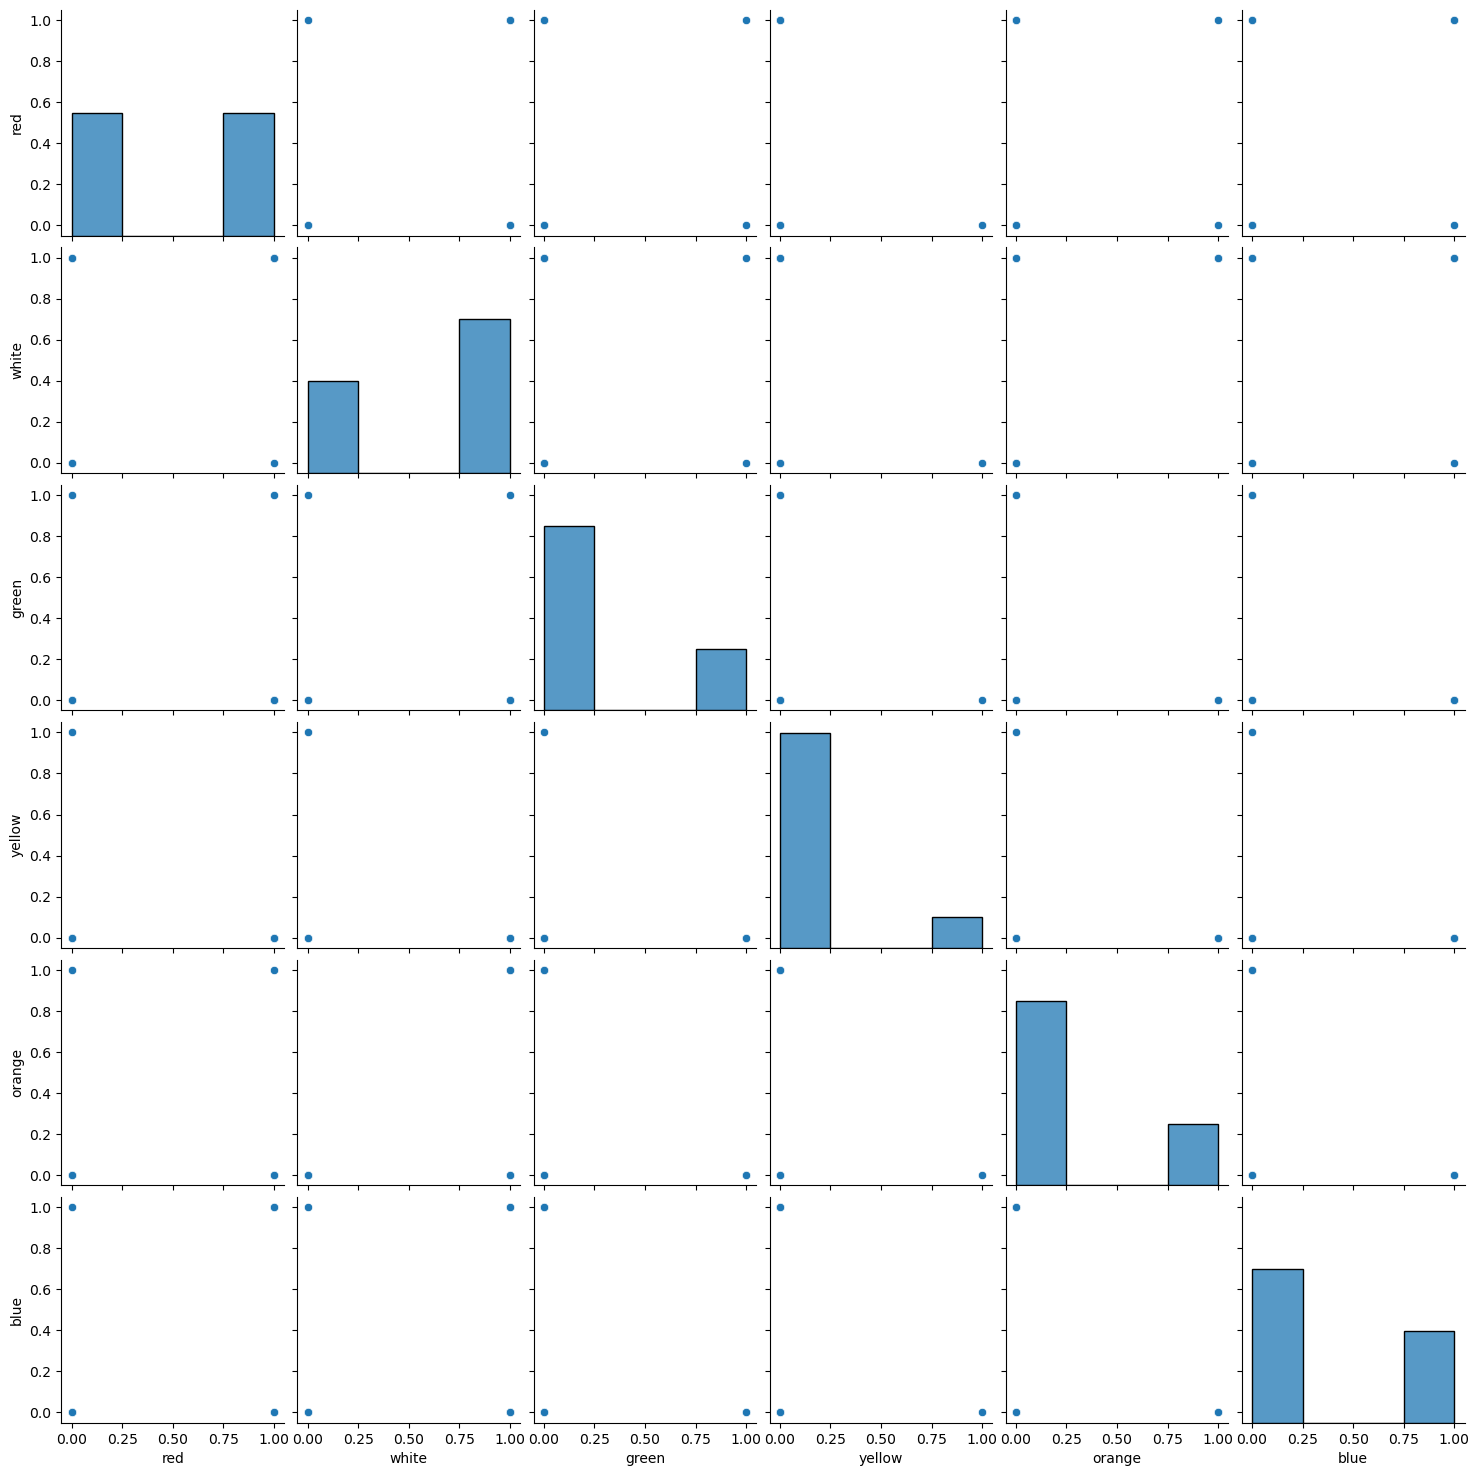

In [35]:
# with seaborn using pair plot to check scatter plots
sns.pairplot(data_num)

In [36]:
# Joining the both Non Numeric and Numeric into data
data = pd.concat((data_cat, data_num), axis = 1)

In [37]:
data

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,green,0,1,0,0,1,0
3,red,white,orange,1,1,0,0,1,0
5,white,blue,orange,0,1,0,0,0,1
6,red,blue,orange,1,0,0,0,0,1
8,green,blue,orange,0,0,1,0,0,0
9,red,white,blue,1,1,0,0,0,1
10,yellow,white,blue,0,0,0,1,0,0


In [38]:
# Converting the data to get numeric values
df = data.iloc[:,3:]

In [39]:
df.describe()

,red,white,green,yellow,orange,blue
count,8.000000,8.000000,8.00000,8.000000,8.00000,8.000000
mean,0.500000,0.625000,0.25000,0.125000,0.25000,0.375000
std,0.534522,0.517549,0.46291,0.353553,0.46291,0.517549
min,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
50%,0.500000,1.000000,0.00000,0.000000,0.00000,0.000000
75%,1.000000,1.000000,0.25000,0.000000,0.25000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000


In [40]:
# Importing mlxtend and using frequent_items to get support
frequent_item = apriori(df, min_support = 0.0075, max_len = 4, use_colnames = True)

In [41]:
frequent_item

,support,itemsets
0,0.500,(red)
1,0.625,(white)
2,0.250,(green)
3,0.125,(yellow)
4,0.250,(orange)
5,0.375,(blue)
6,0.375,"(white, red)"
7,0.125,"(green, red)"
8,0.125,"(orange, red)"
9,0.250,"(blue, red)"


In [42]:
frequent_item.sort_values('support', ascending = False, inplace = True)

In [43]:
frequent_item

,support,itemsets
1,0.625,(white)
0,0.500,(red)
5,0.375,(blue)
6,0.375,"(white, red)"
2,0.250,(green)
4,0.250,(orange)
9,0.250,"(blue, red)"
11,0.250,"(white, orange)"
12,0.250,"(white, blue)"
3,0.125,(yellow)


In [44]:
# imported mlxtend to use association_rule algorithm
rule = association_rules(frequent_item, metric = 'lift', min_threshold  = 1)

In [45]:
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(white),(red),0.625,0.500,0.375,0.600000,1.200000,0.062500,1.250000
1,(red),(white),0.500,0.625,0.375,0.750000,1.200000,0.062500,1.500000
2,(blue),(red),0.375,0.500,0.250,0.666667,1.333333,0.062500,1.500000
3,(red),(blue),0.500,0.375,0.250,0.500000,1.333333,0.062500,1.250000
4,(white),(orange),0.625,0.250,0.250,0.400000,1.600000,0.093750,1.250000
5,(orange),(white),0.250,0.625,0.250,1.000000,1.600000,0.093750,inf
6,(white),(blue),0.625,0.375,0.250,0.400000,1.066667,0.015625,1.041667
7,(blue),(white),0.375,0.625,0.250,0.666667,1.066667,0.015625,1.125000
8,(green),(red),0.250,0.500,0.125,0.500000,1.000000,0.000000,1.000000
9,(red),(green),0.500,0.250,0.125,0.250000,1.000000,0.000000,1.000000


In [46]:
rule.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(red),"(white, green)",0.500,0.125,0.125,0.250000,2.000000,0.062500,1.166667
12,"(white, green)",(red),0.125,0.500,0.125,1.000000,2.000000,0.062500,inf
14,"(green, red)",(white),0.125,0.625,0.125,1.000000,1.600000,0.046875,inf
4,(white),(orange),0.625,0.250,0.250,0.400000,1.600000,0.093750,1.250000
5,(orange),(white),0.250,0.625,0.250,1.000000,1.600000,0.093750,inf
21,(white),"(orange, red)",0.625,0.125,0.125,0.200000,1.600000,0.046875,1.093750
20,"(orange, red)",(white),0.125,0.625,0.125,1.000000,1.600000,0.046875,inf
15,(white),"(green, red)",0.625,0.125,0.125,0.200000,1.600000,0.046875,1.093750
13,"(white, red)",(green),0.375,0.250,0.125,0.333333,1.333333,0.031250,1.125000
2,(blue),(red),0.375,0.500,0.250,0.666667,1.333333,0.062500,1.500000
